## Lab | Handling Data Imbalance in Classification Models

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

* Import the required libraries and modules that you would need.
* Read that data into Python and call the dataframe `churnData`.
* Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using `pd.to_numeric` function.
* Check for null values in the dataframe. Replace the null values.

Note: So far we have not balanced the data.

Managing imbalance in the dataset

* Check for the imbalance.
* Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
* Each time fit the model and see how the accuracy of the model is.

#### Importing libraries

In [13]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings('ignore')

#### loading the data

In [49]:
churnData = pd.read_csv('files_for_lab/Customer-Churn.csv')
churnData.shape

(7043, 16)

#### checking the datatypes

In [50]:
churnData.dtypes #check the datatypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [51]:
churnData['TotalCharges'].value_counts() # we check what values there are

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [52]:
# we remove the empty cells 
churnData['TotalCharges'] = churnData['TotalCharges'].replace(' ',np.nan,regex = True)

# we convert `TotalCharges` into numeric
churnData['TotalCharges']= pd.to_numeric(churnData['TotalCharges'])
churnData['TotalCharges'].dtypes

dtype('float64')

#### checking for null

In [53]:
churnData_nulls= pd.DataFrame(churnData.isna().sum()*100/len(churnData), columns=['percentage'])
churnData_nulls

,percentage
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
OnlineSecurity,0.000000
OnlineBackup,0.000000
DeviceProtection,0.000000
TechSupport,0.000000


We can see that the `TotalCharges` has null values, so we need to replace them
 Other columns dont have any null values in them. 

In [54]:
#find the most frequent value
popular = churnData['TotalCharges'].value_counts(sort=True).reset_index().iloc[0,0]
#fill NAs with the most frequent value
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(popular)
churnData['TotalCharges'].isna().sum()

0

* Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
* * Scale the features either by using normalizer or a standard scaler.
* * Split the data into a training set and a test set.
* * Fit a logistic regression model on the training data.
* * Check the accuracy on the test data.

In [55]:
new_churnData = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

transformer = StandardScaler().fit(new_churnData)
new_churnData_norm = transformer.transform(new_churnData)
num = pd.DataFrame(new_churnData_norm)
num.columns = new_churnData.columns
num.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,-1.277445,-0.439916,-1.160323,-0.992638
1,0.066327,-0.439916,-0.259629,-0.172181
2,-1.236724,-0.439916,-0.362660,-0.958093
3,0.514251,-0.439916,-0.746535,-0.193689
4,-1.236724,-0.439916,0.197365,-0.938901


In [56]:
num.shape[0] == churnData['Churn'].shape[0] # check if the number of rows are the same

True

In [57]:
y = churnData['Churn'] # Target appart
X = num
# We separate training and testing datasets and correspondant targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
# We traing the training dataset using Logistic Regression (multiclass classification)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
# We predict on the testing dataset
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.7799337434926644

check how well the model performed

In [58]:
print(pd.Series(predictions).value_counts())
print(y_test.value_counts())

No     1700
Yes     413
dtype: int64
No     1547
Yes     566
Name: Churn, dtype: int64


In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[1391,  156],
       [ 309,  257]], dtype=int64)

<AxesSubplot:>

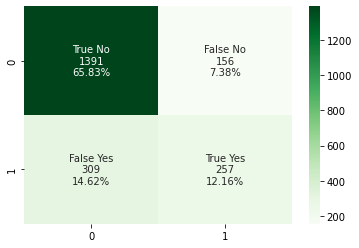

In [60]:
from sklearn.metrics import confusion_matrix

cf_matrix0 = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes',]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix0.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix0.flatten()/np.sum(cf_matrix0)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix0, annot=labels, fmt='', cmap='Greens')


In [61]:
# Accuracy
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))


Accuracy: 0.78



Managing imbalance in the dataset

* Check for the imbalance.
* Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
* Each time fit the model and see how the accuracy of the model is.

In [62]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Upsampling and downsampling

Downsampling

In [63]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
rus = RandomUnderSampler()
y = churnData['Churn']
X = num
X_rus, y_rus = rus.fit_resample(X, y)
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [64]:
y_rus.value_counts()


No     1869
Yes    1869
Name: Churn, dtype: int64

In [65]:
transformer = StandardScaler().fit(X_rus)
X = transformer.transform(X_rus)


X_train, X_test, y_train, y_test = train_test_split(X, y_rus, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.7442067736185384

In [66]:
# Accuracy
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))


Accuracy: 0.74



<AxesSubplot:>

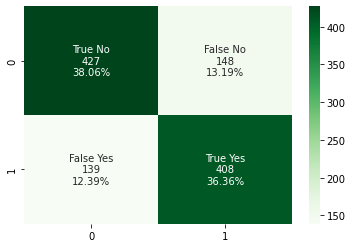

In [67]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes',]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.75      0.74      0.75       575
         Yes       0.73      0.75      0.74       547

    accuracy                           0.74      1122
   macro avg       0.74      0.74      0.74      1122
weighted avg       0.74      0.74      0.74      1122



Upsampling

In [69]:
ros = RandomOverSampler()
y = churnData['Churn']
X = num
X_ros, y_ros = ros.fit_resample(X, y)
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [70]:
y_ros.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [71]:
transformer = StandardScaler().fit(X_ros)
X = transformer.transform(X_ros)

X_train, X_test, y_train, y_test = train_test_split(X, y_ros, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.7384863123993559

In [72]:
 # Accuracy
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))


Accuracy: 0.74



<AxesSubplot:>

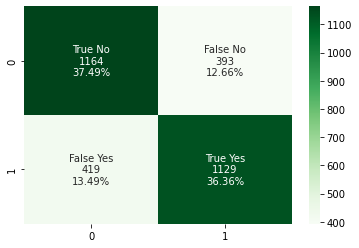

In [73]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes',]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.74      0.75      0.74      1557
         Yes       0.74      0.73      0.74      1548

    accuracy                           0.74      3105
   macro avg       0.74      0.74      0.74      3105
weighted avg       0.74      0.74      0.74      3105



#### Conclusion
The data imbalance has been treated by downsampling and upsampling. The following things were discovered: 
* The accuracy of both techniques is very similar. (74 % vs 74%)
* Without those techniques the accuracy is higher : 78%, but the prediction of the True 'Yes' is lower than prediction of False 'yes'